In [7]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt

# Programming Assignment 1
## Due Date: 11:30 AM, September 30th
This programming assignment asks you to implement 2D image convolution. The actual implementation shouldn’t take you more than 20 lines of code.

## Getting Started
1. The function conv2d is the only piece of code you can and should modify. Do not touch anything else!
2. We have cooked two convolution kernels/filters for you, one for blurring and the other for sharpening. Your job is to implement the actual convolution.
2. Running the code might take some time, since convolution is a heavy computation. Eventually you will see a graph appear. The graph will show 2x3 images. The first column is the original image and its spectrum. The second column should be the blurred image and its spectrum. The last column should be the sharpened image and its spectrum. Before any modification to the code, all three columns are the same. You can visually inspect the images to see if your implementation makes sense.
5. You CANNOT use any other external library to implement convolution.

## What and how to submit
Please submit this Jupyter file to blackboard. Running the code will generate two files, “blur.csv” and “sharpen.csv”. You don’t need to upload those files. Our grading script will compare the content in those files with our “ground truth."

## Grading scheme
The code reads the fig.jpg file provided in the kit. You can certainly play with other images if you want, but our grading will be based on that image. Similarly, you can play with other convolution kernels, but our grading will be based only on the two provided in the code.
You will get full scores if the output matches our ground truth. If not, we will examine your code and decide on a case by case basis how much partial credit you will get.
Have fun!


## Modify this code!

In [8]:
def conv2d(img, kernel):
  ##### This is where you need to implement the convolution
  ##### Right now it just returns the input image |img|
  ##### Change it so that it returns the convolution of |img| and |kernel|
  ##### You can assume no padding. The output dimension will be smaller than input dimension
  ##### Don't change code elsewhere

  # Get the dimensions of the image and kernel
  img_width, img_height = img.shape
  kernel_width, kernel_height = kernel.shape  

  output_width = img_width - kernel_width + 1
  output_height = img_height - kernel_height + 1

  output = np.zeros((output_width, output_height))

  for i in range(output_width):
    for j in range(output_height):
      output[i, j] = np.sum(img[i:i+kernel_width, j:j+kernel_height] * kernel)

  # output = np.convolve(img, kernel, mode='full')

  return output

  conv_img = img;
  return conv_img 

## Helper code (Do not touch!)

In [9]:
def display(img, id, title, axs):
  # display image
  axs[0][id].imshow(img, cmap='gray', vmin=0, vmax=255)
  axs[0][id].axis('off')
  axs[0][id].set_title(title)

  # fft on the image
  img_spec = np.fft.fft2(img)
  # shift the zero-frequency coefficients to the center for better visualization.
  img_spec = np.fft.fftshift(img_spec)
  # show the magnitude of the coefficients (complex-valued numbers) in log scale
  img_spec = np.log(1+np.abs(img_spec))

  # display the spectrum
  amax = int(np.amax(img_spec)) + 1
  axs[1][id].imshow(img_spec, cmap='gray', vmin=0, vmax=amax)
  axs[1][id].axis('off')

## Run this code to generate results

ValueError: object too deep for desired array

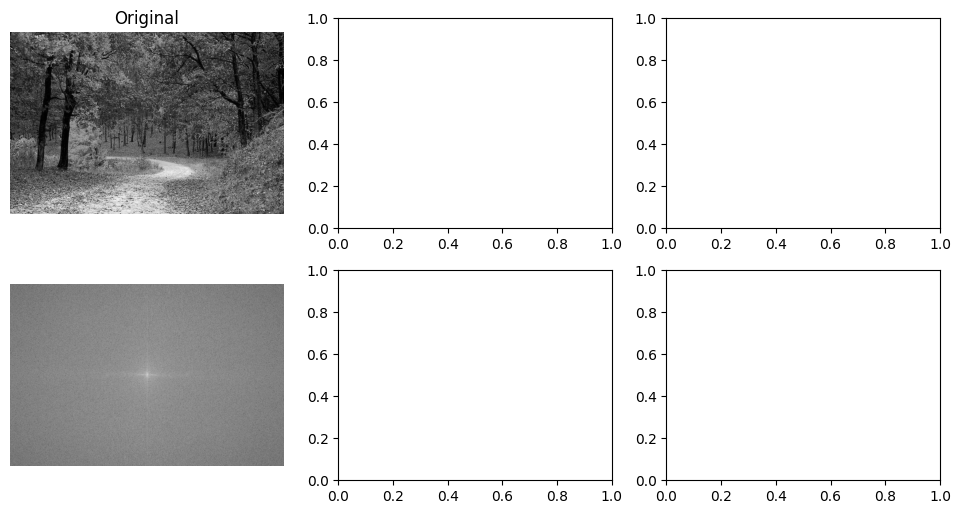

In [10]:
fig,axs = plt.subplots(2,3, figsize=(12,6))

# read image
img = imread('fig.jpg')
# convert RGB to grayscale
img = np.mean(img, -1);

# display original image and its spectrum
display(img, 0, 'Original', axs)

# blur convolution
blur_kernel = np.full((5, 5), 1/25)
conv_img = conv2d(img, blur_kernel)
display(conv_img, 1, 'Blur', axs)
np.savetxt('blur.csv', conv_img)

# sharpening convolution
sharpen_kernel = np.full((5, 5), -1)
sharpen_kernel[2][2] = 25
conv_img = conv2d(img, sharpen_kernel)
display(conv_img, 2, 'Sharpen', axs)
np.savetxt('sharpen.csv', conv_img)

plt.show()